In [1]:
setwd('/Users/juliana.gerardi/Documentos/Pessoais/DSA/FormacaoCientistaDados/curso1_BigdataAnalytics/Projeto1')
getwd()

[1] "/Users/juliana.gerardi/Documentos/Pessoais/DSA/FormacaoCientistaDados/curso1_BigdataAnalytics/Projeto1"

# Definindo o problema
**Prever o consumo de energia de carros elétricos**

## Instalando e carregando pacotes

In [2]:
# install.packages("readxl")
# install.packages("readr")
# install.packages("gmodels")
# install.packages("randomForest")
# install.packages("caret")
# install.packages("ROCR")
# install.packages('corrgram')
# install.packages('corrplot')

In [3]:
library(readxl)
library(readr)
library(gmodels)
library(dplyr)
library(ggplot2)
library(randomForest)
library(caret)
library(ROCR)
library(corrplot)
library(corrgram)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:ggplot2':

    margin


The following object is masked from 'package:dplyr':

    combine


Carregando pacotes exigidos: lattice

corrplot 0.92 loaded


Attaching package: 'corrgram'


The following object is masked from 'package:lattice':

    panel.fill




## Carga e tratamento dos dados

### Carregando o dataset disponibilizado

In [4]:
carros_original <- read_excel("dados.xlsx")

In [5]:
# criando uma cópia, para que as alterações não sejam feitas sobre o dataset original
carros <- carros_original
head(carros)

Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95,438,...,3130,640,5,5,19,200,660,5.7,150,24.45
Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71,340,...,3040,670,5,5,19,190,660,6.8,150,23.80
Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95,364,...,3130,565,5,5,20,210,660,4.5,150,27.55
Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71,346,...,3040,640,5,5,19,190,615,6.8,150,23.30
Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95,447,...,3130,670,5,5,19,200,615,5.7,150,23.85
Audi e-tron Sportback S quattro,Audi,e-tron Sportback S quattro,426200,503,973,disc (front + rear),4WD,95,369,...,3130,565,5,5,20,210,615,4.5,150,27.20


In [6]:
dim(carros)

[1] 53 25

#### Renomeando variáveis

In [7]:
nomes_colunas <- colnames(carros)
nomes_colunas[1] <- 'nome_completo'
nomes_colunas[2] <- 'marca'
nomes_colunas[3] <- 'modelo'
nomes_colunas[4] <- 'preco'
nomes_colunas[5] <- 'potencia'
nomes_colunas[6] <- 'torque'
nomes_colunas[7] <- 'freio_tipo'
nomes_colunas[8] <- 'direcao_tipo'
nomes_colunas[9] <- 'bateria_capacidade'
nomes_colunas[10] <- 'alcance'
nomes_colunas[11] <- 'distancia_entre_eixos'
nomes_colunas[12] <- 'comprimento'
nomes_colunas[13] <- 'largura'
nomes_colunas[14] <- 'altura'
nomes_colunas[15] <- 'peso_vazio'
nomes_colunas[16] <- 'peso_bruto_admissivel'
nomes_colunas[17] <- 'peso_carga_maximo'
nomes_colunas[18] <- 'qtde_assentos'
nomes_colunas[19] <- 'qtde_portas'
nomes_colunas[20] <- 'tamanho_pneu'
nomes_colunas[21] <- 'velocidade_maxima'
nomes_colunas[22] <- 'capacidade_inicializacao'
nomes_colunas[23] <- 'aceleracao'
nomes_colunas[24] <- 'potencia_carregamento'
nomes_colunas[25] <- 'consumo_medio'

colnames(carros) <- nomes_colunas
rm(nomes_colunas)

**Variável target identificada**

consumo_medio (mean - Energy consumption [kWh/100 km])

### Limpeza do dataset e Featuring engineering

#### Tratando dados nulos

In [8]:
# Verificando dados nulos 
colSums(is.na(carros))

nome_completo                    marca                   modelo 
                       0                        0                        0 
                   preco                 potencia                   torque 
                       0                        0                        0 
              freio_tipo             direcao_tipo       bateria_capacidade 
                       1                        0                        0 
                 alcance    distancia_entre_eixos              comprimento 
                       0                        0                        0 
                 largura                   altura               peso_vazio 
                       0                        0                        0 
   peso_bruto_admissivel        peso_carga_maximo            qtde_assentos 
                       8                        8                        0 
             qtde_portas             tamanho_pneu        velocidade_maxima 
                       0                        0                        0 
capacidade_inicializacao               aceleracao    potencia_carregamento 
                       1                        3                        0 
           consumo_medio 
                       9

Verificado que existem dados nulos nas seguintes colunas: 
* freio_tipo: 1
* peso_bruto_admissivel: 8
* peso_carga_maximo: 8
* capacidade_inicializacao: 1
* aceleracao: 3
* consumo_medio: 9

Optei inicialmente por retirar todos os registos onde a variável target estava nula, visto que trata-se do valor que será previsto


In [9]:
carros <- filter(carros, !is.na(consumo_medio))
dim(carros)

[1] 44 25

In [10]:
# Verificando dados nulos após limpeza utilizando consumo_medio
colSums(is.na(carros))

nome_completo                    marca                   modelo 
                       0                        0                        0 
                   preco                 potencia                   torque 
                       0                        0                        0 
              freio_tipo             direcao_tipo       bateria_capacidade 
                       1                        0                        0 
                 alcance    distancia_entre_eixos              comprimento 
                       0                        0                        0 
                 largura                   altura               peso_vazio 
                       0                        0                        0 
   peso_bruto_admissivel        peso_carga_maximo            qtde_assentos 
                       0                        0                        0 
             qtde_portas             tamanho_pneu        velocidade_maxima 
                       0                        0                        0 
capacidade_inicializacao               aceleracao    potencia_carregamento 
                       1                        2                        0 
           consumo_medio 
                       0

Mesmo após a limpeza utilizando a variável consumo_medio, ainda restaram dados nulos:
* freio_tipo: 1
* capacidade_inicializacao: 1
* aceleracao: 2

In [11]:
# Localizando os registos que ainda possuem dados nulos
filter(carros, is.na(freio_tipo) | is.na(capacidade_inicializacao) | is.na(aceleracao))

nome_completo,marca,modelo,preco,potencia,torque,freio_tipo,direcao_tipo,bateria_capacidade,alcance,...,peso_bruto_admissivel,peso_carga_maximo,qtde_assentos,qtde_portas,tamanho_pneu,velocidade_maxima,capacidade_inicializacao,aceleracao,potencia_carregamento,consumo_medio
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mercedes-Benz EQV (long),Mercedes-Benz,EQV (long),339480,204,362,NA,2WD (front),90,356,...,3500,865,6,5,17,160,NA,NA,110,28.2
Nissan e-NV200 evalia,Nissan,e-NV200 evalia,164328,109,254,disc (front + rear),2WD (front),40,200,...,2250,658,5,5,15,123,870,NA,50,25.9


Por se tratar de apenas 2 registros, e um deles possuir duas variáveis nulas, optei por eliminá-los do dataset.

In [12]:
carros <- na.omit(carros)
colSums(is.na(carros))
dim(carros)

nome_completo                    marca                   modelo 
                       0                        0                        0 
                   preco                 potencia                   torque 
                       0                        0                        0 
              freio_tipo             direcao_tipo       bateria_capacidade 
                       0                        0                        0 
                 alcance    distancia_entre_eixos              comprimento 
                       0                        0                        0 
                 largura                   altura               peso_vazio 
                       0                        0                        0 
   peso_bruto_admissivel        peso_carga_maximo            qtde_assentos 
                       0                        0                        0 
             qtde_portas             tamanho_pneu        velocidade_maxima 
                       0                        0                        0 
capacidade_inicializacao               aceleracao    potencia_carregamento 
                       0                        0                        0 
           consumo_medio 
                       0

[1] 42 25

#### Featuring engeneering

In [13]:
# Criando dataset de cópia 'limpo'
carros_limpo <- carros

In [14]:
# Removendo as variáveis com o nome do carro e modelo, visto que não podem ser utilizados como variáveis preditoras
carros$nome_completo <- NULL
carros$modelo <- NULL

In [15]:
# Transformando as variáveis categóricas em fator
carros$marca <- as.factor(carros$marca)
carros$freio_tipo <- as.factor(carros$freio_tipo)
carros$direcao_tipo <- as.factor(carros$direcao_tipo)
carros$qtde_assentos <- as.factor(carros$qtde_assentos)
carros$qtde_portas <- as.factor(carros$qtde_portas)
carros$tamanho_pneu <- as.factor(carros$tamanho_pneu)

In [16]:
# Convertendo as variáveis comprimento e largura para área, de forma que representam o tamanho do carro
carros$tamanho <- carros$largura * carros$comprimento
carros$largura <- NULL
carros$comprimento <- NULL

In [17]:
# queremos utilizar características físicas dos véiculos para fazer a construção do modelo, e por esse motivo, vamos eliminar a variável preco
carros$preco <- NULL


### Análise exploratória

In [18]:
summary(carros)

        marca       potencia         torque      
 Audi      : 6   Min.   : 82.0   Min.   : 160.0  
 Kia       : 4   1st Qu.:136.0   1st Qu.: 260.0  
 Porsche   : 4   Median :184.0   Median : 317.5  
 Volkswagen: 4   Mean   :237.7   Mean   : 425.2  
 BMW       : 3   3rd Qu.:313.0   3rd Qu.: 540.0  
 Hyundai   : 3   Max.   :625.0   Max.   :1050.0  
 (Other)   :18                                   
                      freio_tipo      direcao_tipo bateria_capacidade
 disc (front + rear)       :35   2WD (front):20    Min.   :17.60     
 disc (front) + drum (rear): 7   2WD (rear) :10    1st Qu.:39.20     
                                 4WD        :12    Median :52.00     
                                                   Mean   :58.84     
                                                   3rd Qu.:78.65     
                                                   Max.   :95.00     
                                                                     
    alcance      distancia_entre_eixos  

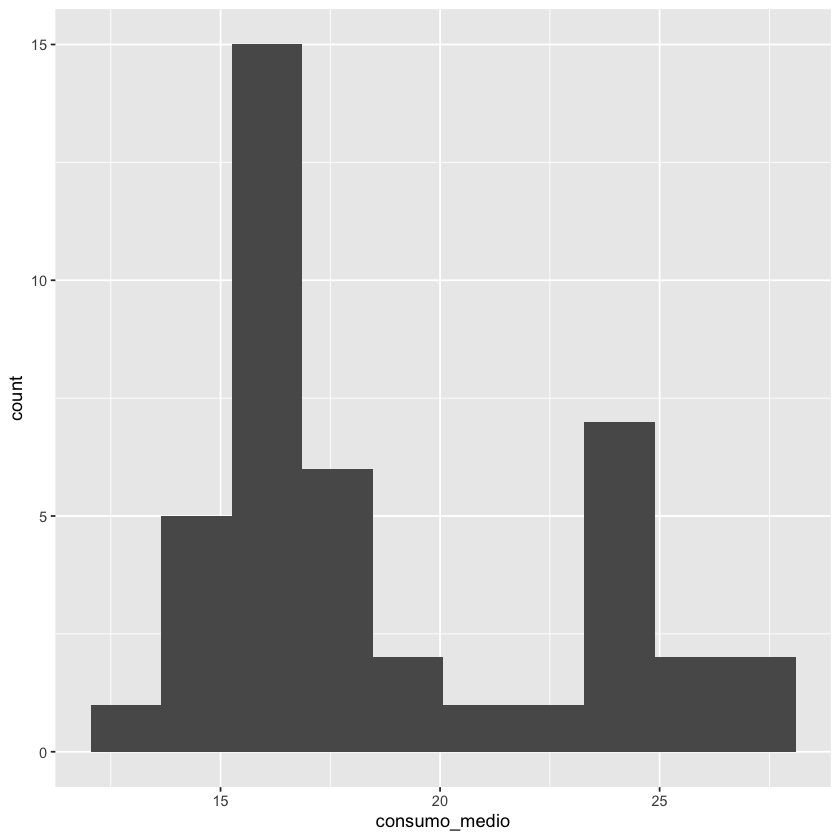

In [19]:
# Verificando a distribuição do consumo médio

ggplot(carros, aes(x = consumo_medio)) + 
  geom_histogram(bins = 10)

## Construção do modelo

### Featuring selection

In [20]:
# Separei as variáveis numéricas em alguns grupos de acordo com o assunto, com o objetivo de diminuir a quantidade de variáveis

grupo_motor = carros[ , c(2,3,16,17,18,20)]
grupo_bateria = carros[ ,c(6,7,19,20)]
grupo_caract_fisicas = carros[ ,c(1,4,5,8,9,13,14,15,21,20)]
grupo_peso = carros[ ,c(10,11,12,20)]


In [21]:
# parâmetros para construção dos gráficos
panel.hist <- function(x, ...)
{
  usr <- par("usr"); on.exit(par(usr))
  par(usr = c(usr[1:2], 0, 1.5) )
  h <- hist(x, plot = FALSE)
  breaks <- h$breaks; nB <- length(breaks)
  y <- h$counts; y <- y/max(y)
  rect(breaks[-nB], 0, breaks[-1], y, col = "cyan", ...)
}
panel.cor <- function(x, y, digits = 2, prefix = "", cex.cor, ...)
{
  usr <- par("usr"); on.exit(par(usr))
  par(usr = c(0, 1, 0, 1))
  r <- abs(cor(x, y))
  txt <- format(c(r, 0.123456789), digits = digits)[1]
  txt <- paste0(prefix, txt)
  if(missing(cex.cor)) cex.cor <- 0.8/strwidth(txt)
  text(0.5, 0.5, txt, cex = cex.cor * r)
}

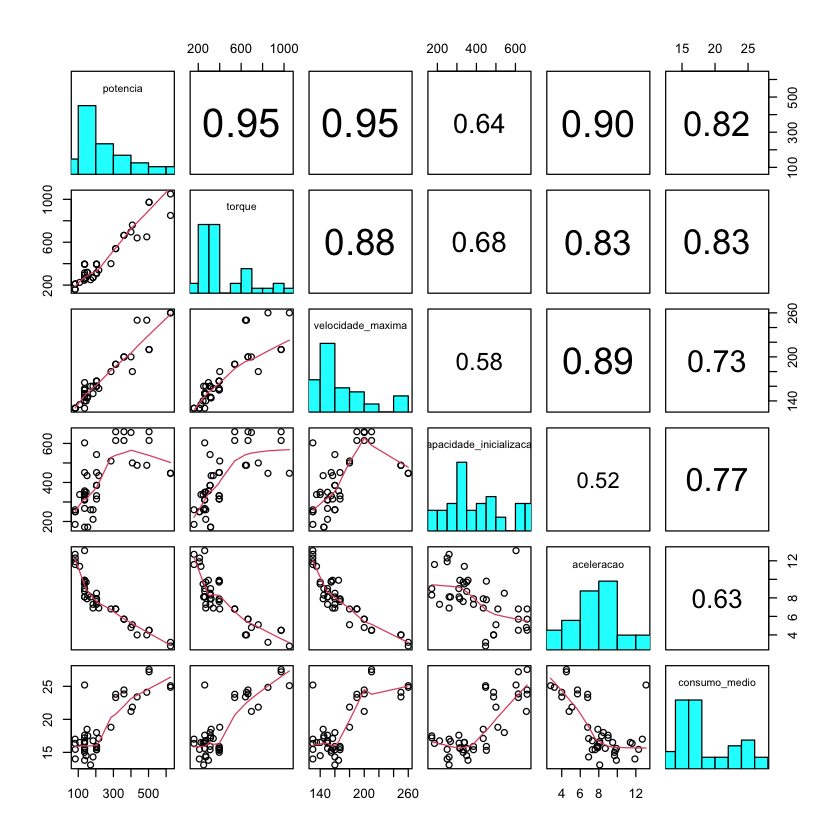

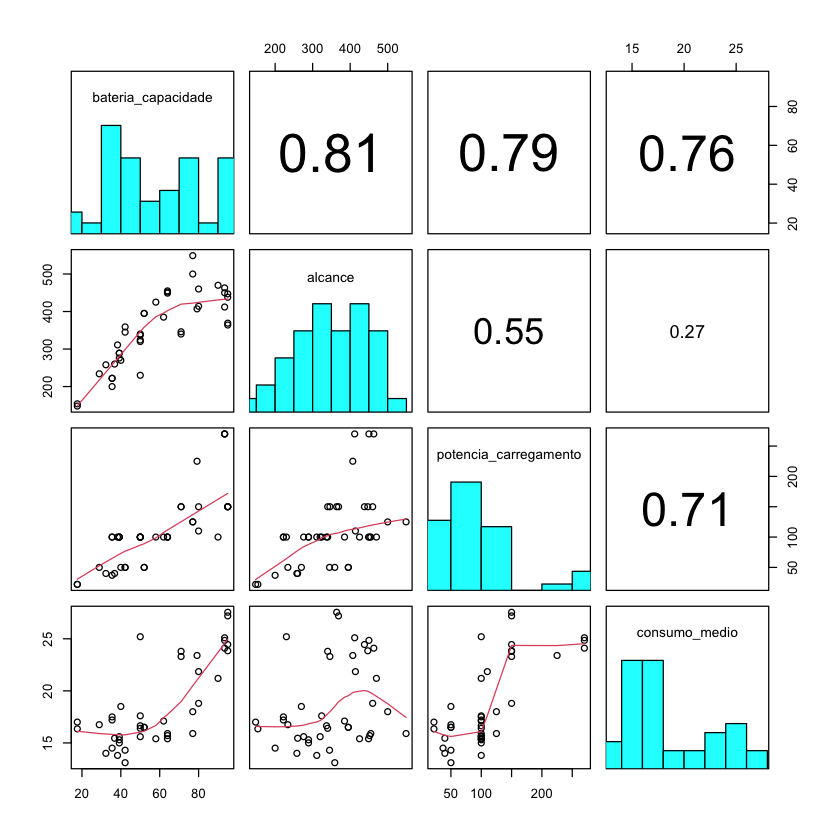

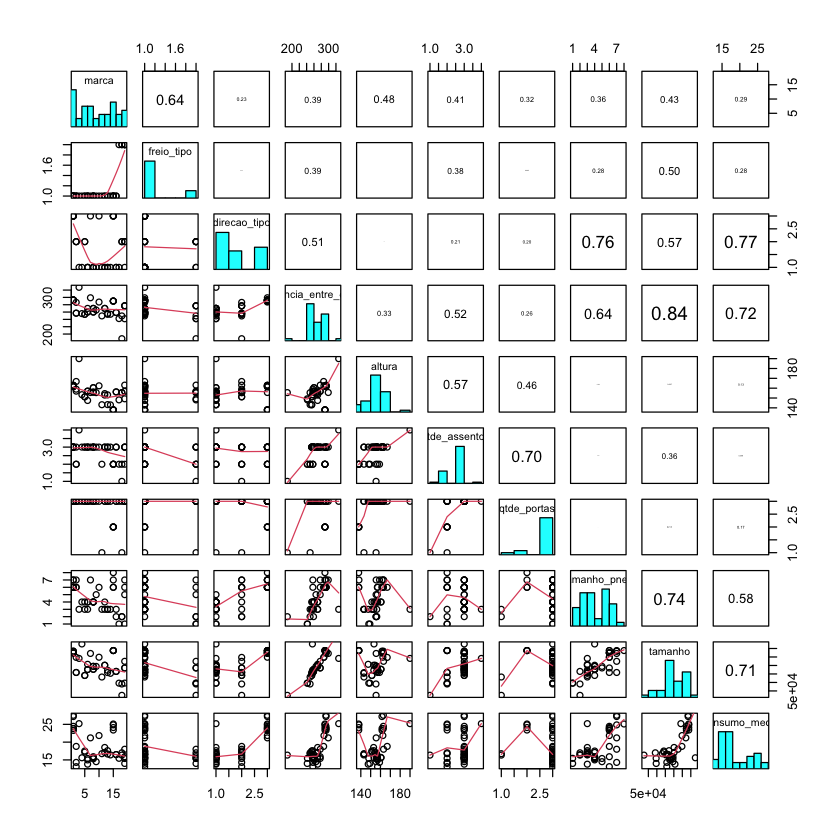

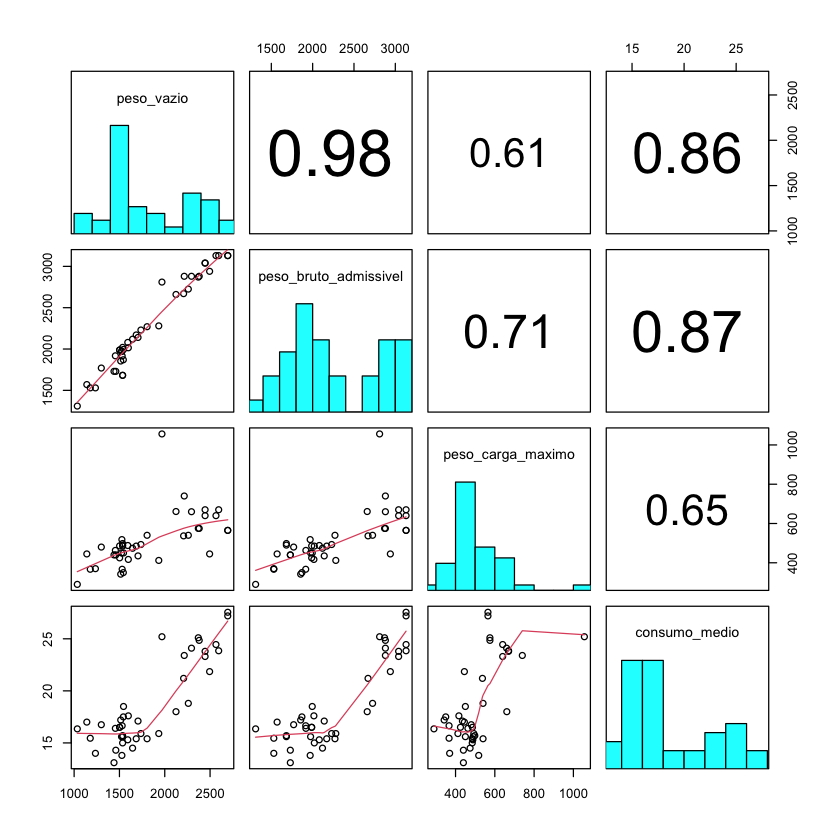

In [22]:
pairs(grupo_motor, diag.panel = panel.hist, upper.panel = panel.cor, lower.panel = panel.smooth)
pairs(grupo_bateria, diag.panel = panel.hist, upper.panel = panel.cor, lower.panel = panel.smooth)
pairs(grupo_caract_fisicas, diag.panel = panel.hist, upper.panel = panel.cor, lower.panel = panel.smooth)
pairs(grupo_peso, diag.panel = panel.hist, upper.panel = panel.cor, lower.panel = panel.smooth)


**Análise dos gráficos de correlação**
* as variáveis potência e torque possuem uma correlação de 0,95, e correlação praticamente igual em relação ao consumo médio (0.82 e 0.83), e por esse motivo uma delas pode ser descartada. Escolhi excluir torque.
* as variáveis peso_vazio e peso_bruto_admissivel possuem uma correlação de 0,98, e correlação praticamente igual em relação ao consumo médio (0.86 e 0.87), e por esse motivo uma delas pode ser descartada. Escolhi excluir peso_bruto_admissivel
* as variáveis altura, qtde_assentos e qtde_portas possuem correlação próxima de 0 com o consumo médio, portanto serâo eliminadas

In [23]:
# Eliminando as variáveis
carros$torque <- NULL
carros$distancia_entre_eixos <- NULL
carros$altura <- NULL
carros$qtde_assentos <- NULL
carros$qtde_portas <- NULL
carros$peso_bruto_admissivel <- NULL
carros$preco <- NULL

**Analisando a correlação de todas as variáveis numéricas ao mesmo tempo**

In [24]:
# Obtendo apenas as colunas numéricas
colunas_numericas <- sapply(carros, is.numeric)
colunas_numericas

marca                 potencia               freio_tipo 
                   FALSE                     TRUE                    FALSE 
            direcao_tipo       bateria_capacidade                  alcance 
                   FALSE                     TRUE                     TRUE 
              peso_vazio        peso_carga_maximo             tamanho_pneu 
                    TRUE                     TRUE                    FALSE 
       velocidade_maxima capacidade_inicializacao               aceleracao 
                    TRUE                     TRUE                     TRUE 
   potencia_carregamento            consumo_medio                  tamanho 
                    TRUE                     TRUE                     TRUE

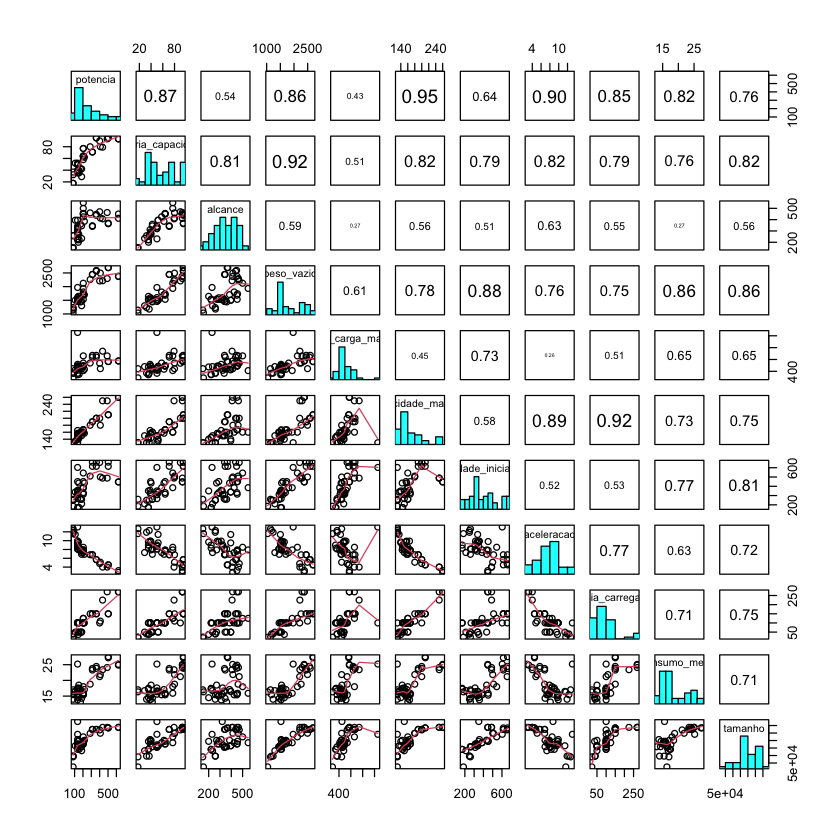

In [25]:
pairs(carros[,colunas_numericas], diag.panel = panel.hist, upper.panel = panel.cor, lower.panel = panel.smooth)

* a potência, velocidade_maxima e aceleracao possuem correlação maior de 0.9 entre elas, e praticamente a mesma correlação com o consumo médio, portanto, optei por manter a potência

In [26]:
carros$velocidade_maxima <- NULL
carros$aceleracao <- NULL

Utilizando ANOVA, testando se as variáveis escolhidas tem influencia no consumo médio

In [27]:
anova <- aov(consumo_medio ~ ., data = carros)
summary(anova)

                         Df Sum Sq Mean Sq F value   Pr(>F)    
marca                    18  652.1   36.23  92.289 4.84e-08 ***
potencia                  1   28.3   28.32  72.147 1.37e-05 ***
direcao_tipo              1    0.1    0.11   0.281 0.608842    
bateria_capacidade        1    1.3    1.28   3.271 0.103950    
alcance                   1   11.8   11.81  30.075 0.000388 ***
peso_vazio                1    1.4    1.41   3.581 0.091001 .  
peso_carga_maximo         1    0.1    0.14   0.363 0.561631    
tamanho_pneu              5    1.3    0.26   0.654 0.666661    
capacidade_inicializacao  1    0.0    0.04   0.105 0.753429    
potencia_carregamento     1    0.6    0.61   1.564 0.242576    
tamanho                   1    0.1    0.09   0.241 0.635020    
Residuals                 9    3.5    0.39                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Pelo método da ANOVA, as variáveis com maior significância são:
1. marca
2. potencia
3. alcance
5. peso_vazio
6. bateria_capacidade

## Treinando modelos

### Criando datasets de treino e teste

In [28]:
sample <- sample(c(TRUE, FALSE), nrow(carros), replace=TRUE, prob=c(0.8,0.2))
carros_treino  <- carros[sample, ]
carros_teste   <- carros[!sample, ]

dim(carros_treino)
dim(carros_teste)

[1] 32 13

[1] 10 13

In [29]:
# Obtendo apenas as colunas numéricas
colunas_numericas <- sapply(carros, is.numeric)

carros_treino_num_cols  <- carros_treino[, colunas_numericas]
carros_teste_num_cols   <- carros_teste[, colunas_numericas]

dim(carros_treino_num_cols)
dim(carros_teste_num_cols)

[1] 32  9

[1] 10  9

### Criando modelos

#### Utilizando regressão linear

Utilizando regressão linear com todas as variáveis numéricas

In [30]:
lm_v1 <- lm(consumo_medio ~ .
            , data=carros_treino_num_cols
)
summary(lm_v1)


Call:
lm(formula = consumo_medio ~ ., data = carros_treino_num_cols)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.1560 -0.6193  0.1223  0.4567  1.8688 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               1.626e+01  1.820e+00   8.931 6.18e-09 ***
potencia                  3.941e-03  3.515e-03   1.121  0.27378    
bateria_capacidade        2.256e-01  4.322e-02   5.219 2.71e-05 ***
alcance                  -3.763e-02  4.483e-03  -8.392 1.87e-08 ***
peso_vazio                9.400e-04  1.553e-03   0.605  0.55094    
peso_carga_maximo         7.484e-03  2.047e-03   3.656  0.00131 ** 
capacidade_inicializacao  7.421e-04  3.630e-03   0.204  0.83978    
potencia_carregamento    -2.027e-03  6.527e-03  -0.311  0.75889    
tamanho                  -5.134e-05  2.480e-05  -2.070  0.04985 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.897 on 23 degrees of freedom
Multiple R-square

**Resultados:**
Nessa primeira tentativa, já tivemos um resultado bastante satisfatório, portanto, considerarei este como o modelo final utilizando a regressão linear
* R2: 0.9358
* Variáveis mais importantes: bateria_capacidade, alcance, peso_carga_maximo, tamanho

#### Utilizando Randon Forest


Call:
 randomForest(formula = consumo_medio ~ ., data = carros, ntree = 200,      nodesize = 10, importance = T) 
               Type of random forest: regression
                     Number of trees: 200
No. of variables tried at each split: 4

          Mean of squared residuals: 2.765176
                    % Var explained: 83.43


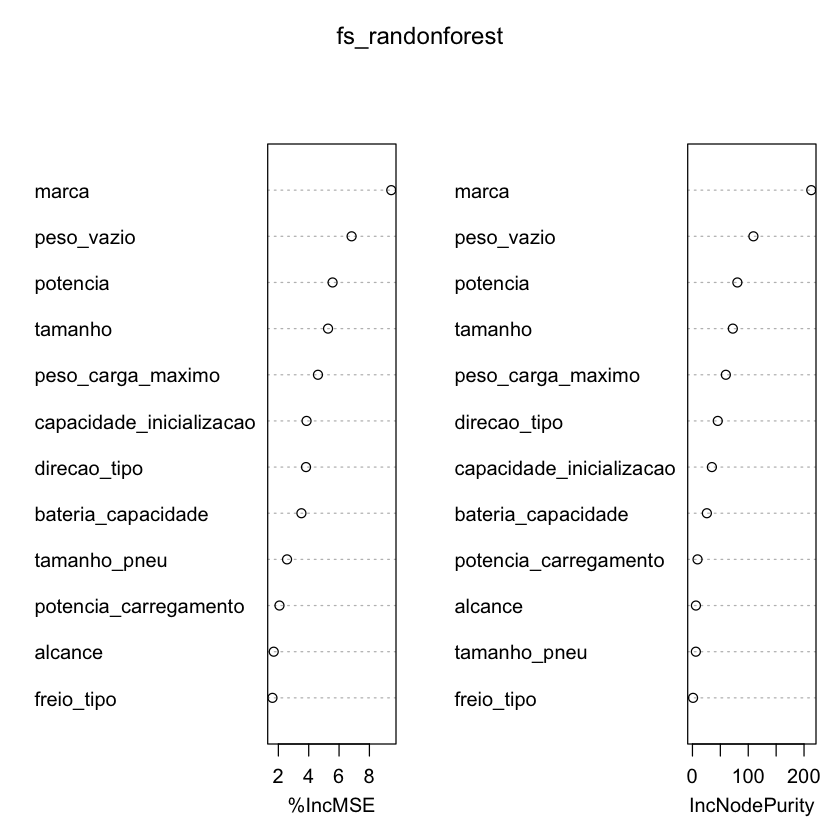

In [31]:
# Utilizando o randonForest para selecionar as variáveis mais importantes
fs_randonforest <- randomForest( consumo_medio ~ ., data = carros, 
                        ntree = 200, nodesize = 10, importance = T)

varImpPlot(fs_randonforest)
print(fs_randonforest)

Conforme o índice de importância utilizando o randonForest, serão consideradas as variáveis:
1. marca
2. peso_vazio 
3. tamanho
4. peso_carga_maximo
5. direcao_tipo
6. capacidade_inicializacao
7. potencia

Essas variáveis ficaram 'bem colocadas' seguindo os dois métodos de selecao

In [32]:
# Utilizando apenas as variáveis mais importantes

randonforest_v1 <- randomForest( consumo_medio ~ marca + peso_vazio + tamanho + peso_carga_maximo + direcao_tipo + capacidade_inicializacao + potencia
                                    ,data = carros_treino, ntree = 200, nodesize = 10, importance = T)

print(randonforest_v1)


Call:
 randomForest(formula = consumo_medio ~ marca + peso_vazio + tamanho +      peso_carga_maximo + direcao_tipo + capacidade_inicializacao +      potencia, data = carros_treino, ntree = 200, nodesize = 10,      importance = T) 
               Type of random forest: regression
                     Number of trees: 200
No. of variables tried at each split: 2

          Mean of squared residuals: 3.466592
                    % Var explained: 81.91


In [33]:
# Utilizando apenas as variáveis mais importantes conforme o método ANOVA

randonforest_v2 <- randomForest( consumo_medio ~ marca + potencia + alcance + peso_vazio + bateria_capacidade
                                    ,data = carros_treino, ntree = 200, nodesize = 10, importance = T)

print(randonforest_v2)


Call:
 randomForest(formula = consumo_medio ~ marca + potencia + alcance +      peso_vazio + bateria_capacidade, data = carros_treino, ntree = 200,      nodesize = 10, importance = T) 
               Type of random forest: regression
                     Number of trees: 200
No. of variables tried at each split: 1

          Mean of squared residuals: 4.575166
                    % Var explained: 76.12


In [34]:
# Utilizando apenas as variáveis mais importantes conforme o método da regressão linear

randonforest_v3 <- randomForest( consumo_medio ~ bateria_capacidade + alcance + peso_carga_maximo + tamanho
                                    ,data = carros_treino, ntree = 200, nodesize = 10, importance = T)

print(randonforest_v3)


Call:
 randomForest(formula = consumo_medio ~ bateria_capacidade + alcance +      peso_carga_maximo + tamanho, data = carros_treino, ntree = 200,      nodesize = 10, importance = T) 
               Type of random forest: regression
                     Number of trees: 200
No. of variables tried at each split: 1

          Mean of squared residuals: 4.303882
                    % Var explained: 77.54


In [35]:
# Utilizando apenas as variáveis numéricas

randonforest_v4 <- randomForest( consumo_medio ~ .,data = carros_treino_num_cols, ntree = 200, nodesize = 10, importance = T)

print(randonforest_v4)


Call:
 randomForest(formula = consumo_medio ~ ., data = carros_treino_num_cols,      ntree = 200, nodesize = 10, importance = T) 
               Type of random forest: regression
                     Number of trees: 200
No. of variables tried at each split: 2

          Mean of squared residuals: 4.125999
                    % Var explained: 78.47


Nenhum resultado satisfatório utilizando Randon Forest

### Analisando o modelo selecionado

Devido ao resultado R2, escolhi o modelo lm_v1, baseado no R2

In [36]:
# Obtendo os resíduos
res <- residuals(lm_v1)
res <- as.data.frame(res)
head(res)

,res
,<dbl>
1,-0.6908848
2,0.4585962
3,-0.3955159
4,0.4422517
5,-0.5239915
6,-0.8922000


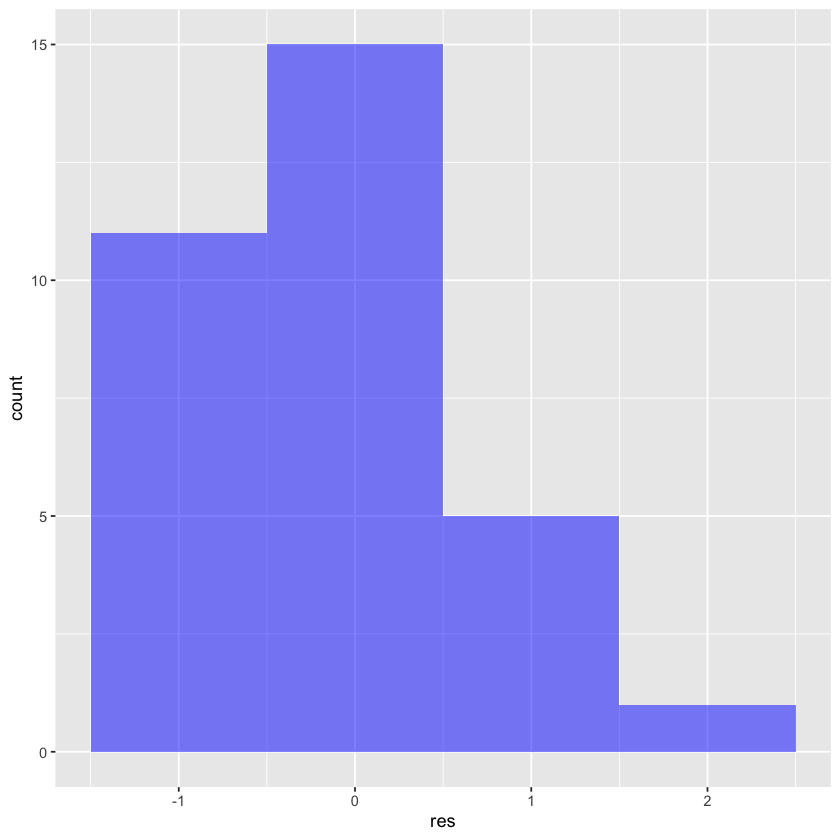

In [37]:
# Histograma dos resíduos
ggplot(res, aes(x = res)) +  
  geom_histogram(fill = 'blue', 
                 alpha = 0.5, 
                 binwidth = 1)

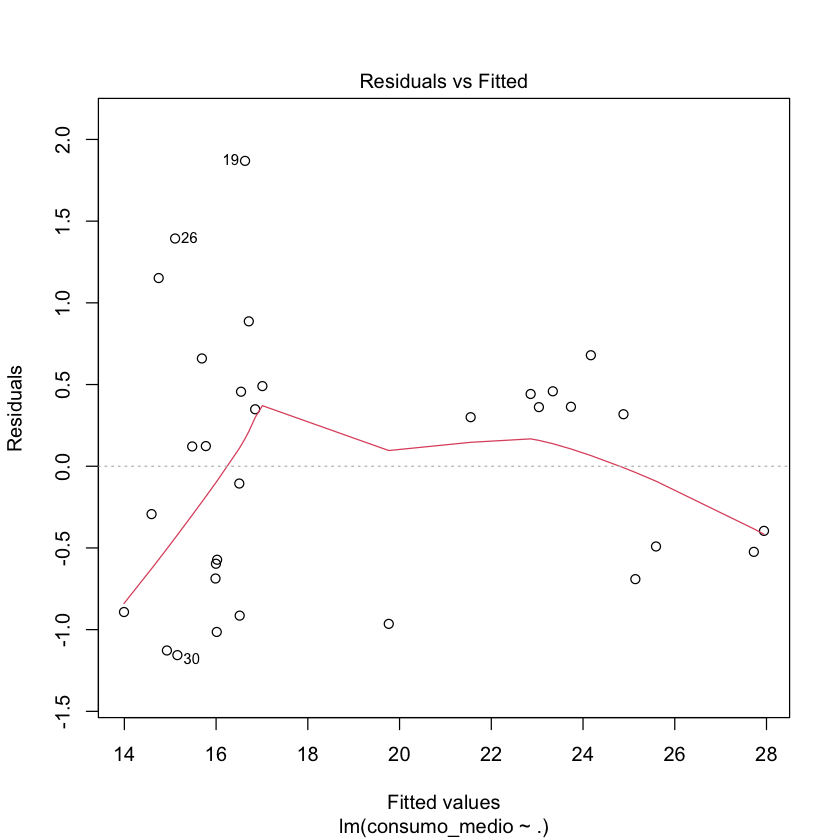

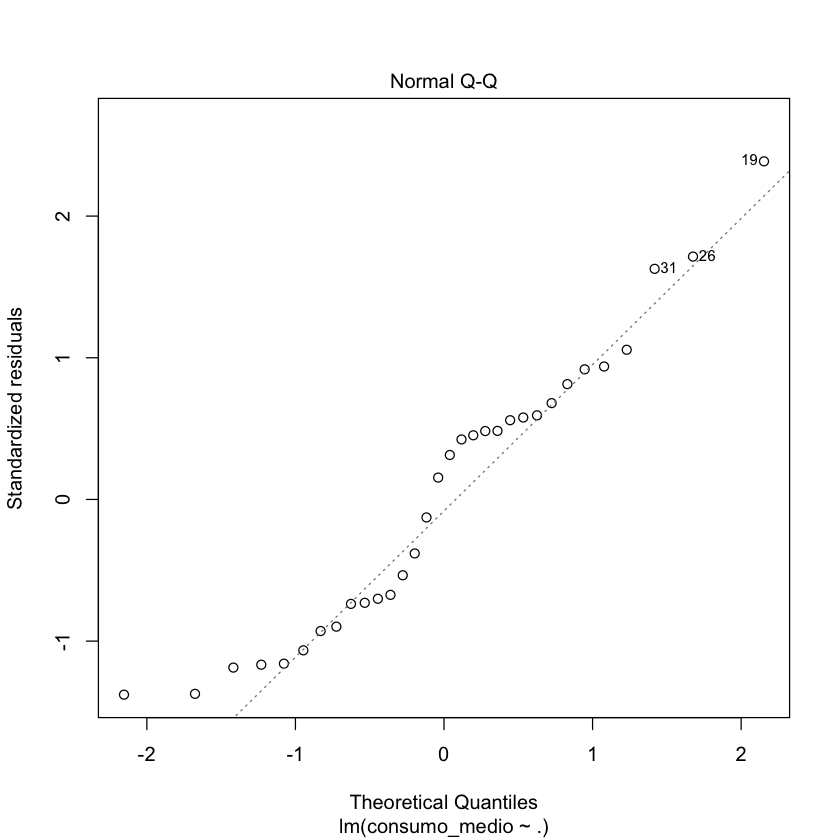

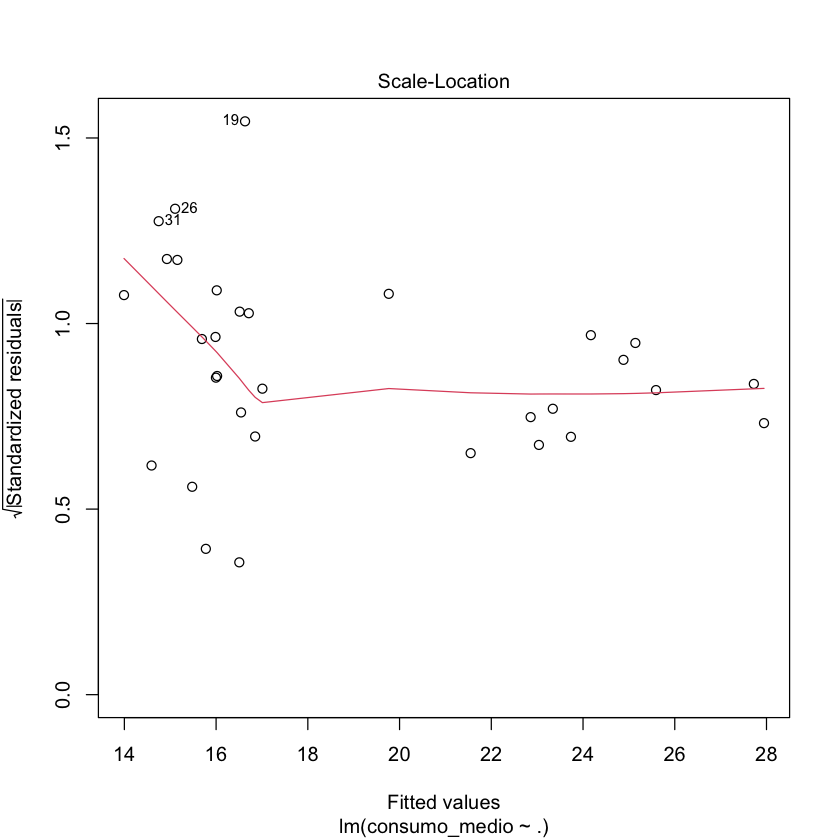

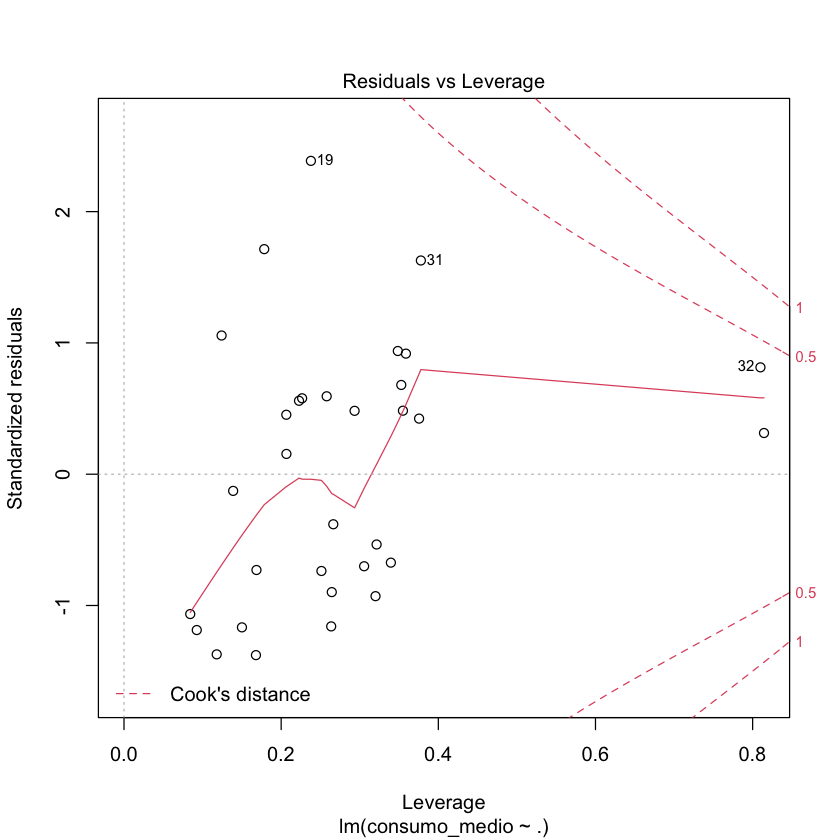

In [38]:
# Plot do Modelo
plot(lm_v1)


In [39]:
# Fazendo predicoes
previsto <- predict(lm_v1, carros_teste_num_cols)
previsto

1        2        3        4        5        6        7        8 
25.02156 21.99364 15.81370 18.53854 16.15646 17.46721 15.89195 14.54342 
       9       10 
16.01566 18.35003

In [40]:
# Visualizando os valores previstos e observados
resultados <- cbind(previsto, carros_teste_num_cols$consumo_medio) 
colnames(resultados) <- c('Previsto','Real')
resultados <- as.data.frame(resultados)
resultados$id <- c(1:nrow(resultados))
resultados


,Previsto,Real,id
,<dbl>,<dbl>,<int>
1,25.02156,23.85,1
2,21.99364,21.20,2
3,15.81370,15.70,3
4,18.53854,14.50,4
5,16.15646,16.75,5
6,17.46721,17.10,6
7,15.89195,16.65,7
8,14.54342,16.50,8
9,16.01566,15.40,9


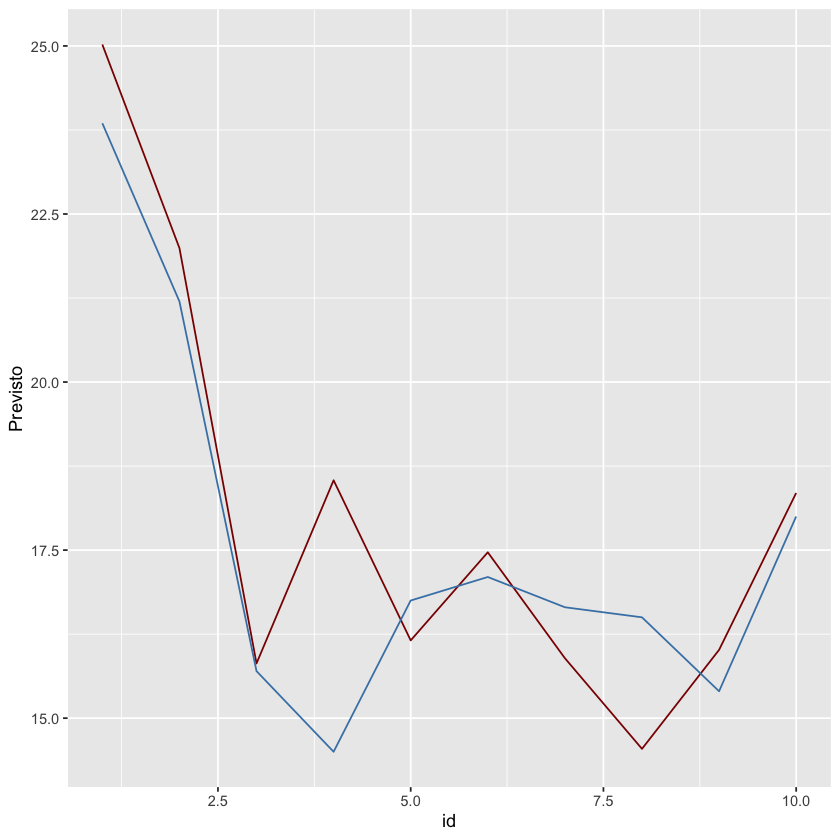

In [41]:
ggplot(resultados, aes(x=id)) + 
  geom_line(aes(y = Previsto), color = "darkred") + 
  geom_line(aes(y = Real), color="steelblue") 